# Justin Park

## Readings

Before answering the questions below, please do the following readings. The questions test material directly from these readings so it is highly reccomeded to read them in depth if you struggle with any of the questions.

1. Review lecture slides from last week on Deep Learning for Images. 
    * [Slides](http://nbviewer.jupyter.org/github/UMD-CS-STICs/389Aspring18/blob/master/lectures/week_07/slides_07.pdf)
2. Understand and optionally (but highly reccomended) run the code written by the Keras team.
    * [Code](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)
3. (Optional) If you have a hard time understanding CNN's well, read both Part 1 & 2 of this short blog which gives a nice introduction to CNN's.
    * [Part 1](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)
    * [Part 2](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)
4. (Optional) A very nice but math oriented overview of convolutions by Chris Olah.
    * [Blog Post](http://colah.github.io/posts/2014-07-Understanding-Convolutions/)

## Questions

Please answer the follow the format to answer the following questions in the same cell. If you need to write any code to help you answer your questions, please create a new cell block directly under your answer and before the next question.

### Question 1

Recall that we refer to the dimension of an image with `h x w x d`. What are `h`, `w`, and `d`? How do the dimensions of grayscale images differ from color images? Can we use the same exact filter we use on a grayscale image for color images?

__Answer:__ h and w stand for height and width. d stands for depth which is the number of values per pixel. Grayscale images have a depth of 1 while color images have a depth of 3. You can use the same filter for grayscale images on color images but extra work needs to be done to account for the 2 extra values per pixel in color images.

### Question 2

I have a convolutional layer where I apply `6` filters each of size `4x4x3` to an input image with dimensions of `64x64x3`. What is the total number of learnable (trainable) parameters in this layer? Please include a brief equation on how you computed the number.

__Answer:__ Using the formula: $ O = ((W - K + 2 * P) / S) + 1 $, I computed the output height/width to be `61`. Since we are applying `6` filters, the output image will have a dimension of `61x61x3`. Multiplying `61x61x3` gives us `11,163` trainable features.

### Question 3

I have a `3x3` image:
$
\begin{bmatrix} 
2 & 43 & 139 \\
0 & 201 & 10 \\
49 & 180 & 244
\end{bmatrix}
$
and convolve the following `2x2` filter
$
\begin{bmatrix} 
1 & 2 \\
3 & 1
\end{bmatrix}
$
with it. What is the result of the convolution and it's dimension?

(Double click on this cell block to see how to write a table in $\LaTeX$)

__Answer:__ The result of the convolution is:
$
\begin{bmatrix}
289 & 934 \\
729 & 1005 \\
\end{bmatrix}
$.
The dimension of the result is `2x2`.

CIFAR-10 is a classic dataset for vision which contains 60000 `32x32` color images for 10 different classes. The following two questions refer to this [code](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py) which builds a model to train on the CIFAR dataset.

### Question 4

Describe the model in the code they've written. How many layers does it have? How many are convolutional layers, pooling layers, dropout layers, flat fully connected layers? What optimizer do they use and what's their learning rate? Why do they divide the features (images) by 255 on lines `67-68`?

__Answer:__ There are `11` layers in total. There are `3` convolutional layers, `2` pooling layers, `3` dropout layers, and `2` flat fully connected layers. They use the RMSprop optimizer with a learning rate of `0.0001`. They divide the features by `255` to normalize the values between `0` and `1`.

### Question 5

In class, we briefly talked about data augmentation. Specifically, how we can take a limited dataset and expand it to give us more training examples. One example of this is flipping an image of a car driving left to get an example of a car driving right. You could also strategically darken the image of a car driving during the day and make it look like it's driving at night. Looking at lines `80-90`, we can see that they use an `ImageGenerator` to do this data augmentation.

Your task, write code to perform 3 data augmentation transformations on `img`. I already read in the image and reshaped it to be `128x128`. Some examples of transformations you could do include (but are not limited to) flipping, shifting, cropping, recoloring, etc. Please have a final cell block which displays your final transformed images.

You can find the documentation for `ImageGenerator` [here](https://keras.io/preprocessing/image/) and examples of how to use it [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) and [here](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/).

Image from [here](http://www.wallpapers13.com/tom-and-jerry-desktop-backgrounds-hd-2560x1600/).

__Answer Code Below__

In [1]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Load sample image and reshape it
img = load_img('sample.jpg', target_size=(128,128,3))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Initialize our ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True
)

# Save 20 images into the samples/ directory
i = 1
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='samples', save_prefix='sample', save_format='jpeg'):
    # Break after 20 images are saved
    if i > 20:
        break
        
    i += 1

/home/justin/.virtualenvs/cmsc389a/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


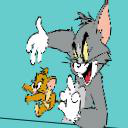

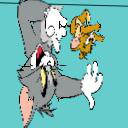

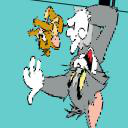

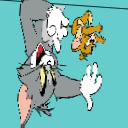

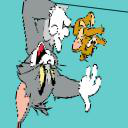

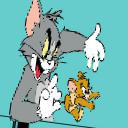

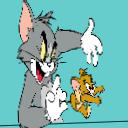

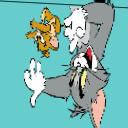

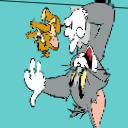

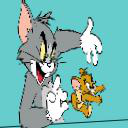

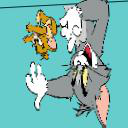

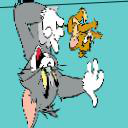

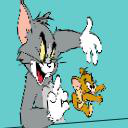

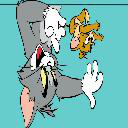

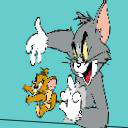

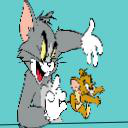

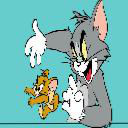

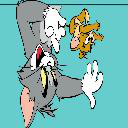

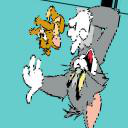

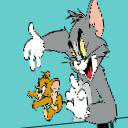

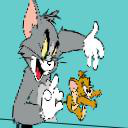

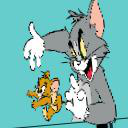

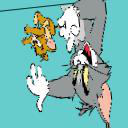

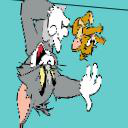

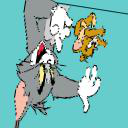

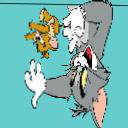

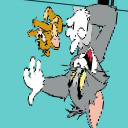

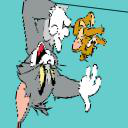

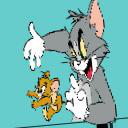

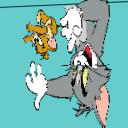

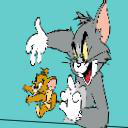

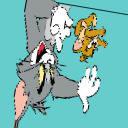

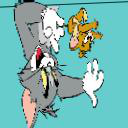

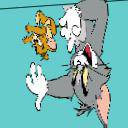

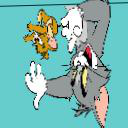

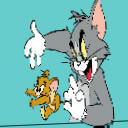

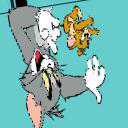

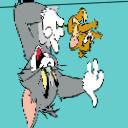

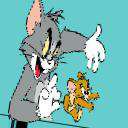

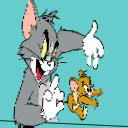

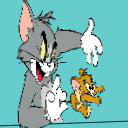

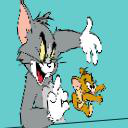

In [2]:
from os import listdir

# Images are stored in this directory
path = 'samples'

# Get list of images in directory
imagesList = listdir(path)

# Display each image
for filename in imagesList:
    img = load_img(path + '/' + filename)
    display(img)